In [123]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from EOF import EOF
import datetime 
from scipy.interpolate import RectBivariateSpline
from scipy.fftpack import fft,ifft,fftfreq, fftshift

In [124]:
from Dycore import Dycore
def read_all_var(pr_start, pr_to, pr_leap, start, end, internal_day, total_file):
        total_pr = int((pr_to - pr_start) / pr_leap)
        total_day = int(total_file*internal_day)
        
        qv      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        qv_diff = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        u       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        v       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        t       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        p       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        ps      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        p_half  = np.zeros(((((total_pr, total_day, 21, 64, 128)))))
        
        a = 0
        for pr in range(pr_start, pr_to, pr_leap):
            k = 0
            for day in range(start,end,internal_day):
                print(day)
                # file  = f"HSt42_{pr}_EMF_might_error_edition/RH80_PR{pr}_1600day_startfrom_{day}day_final.dat"
                file  = f"HSt42_{pr}/RH80_PR{pr}_3000day_startfrom_{day}day_final.dat"
                
                dycore = Dycore(file)
                
                qv[a,k*100:(k+1)*100,:,:,:]      = dycore.qv
                qv_diff[a,k*100:(k+1)*100,:,:,:] = dycore.qv_diff
                u[a,k*100:(k+1)*100,:,:,:]       = dycore.u
                v[a,k*100:(k+1)*100,:,:,:]       = dycore.v
                t[a,k*100:(k+1)*100,:,:,:]       = dycore.t
                
                ps[a,k*100:(k+1)*100,:,:,:]      = dycore.ps
                p[a,k*100:(k+1)*100,:,:,:]       = dycore.p
                
                p_half[a,k*100:(k+1)*100,:,:,:]  = dycore.p_half
                            
                k += 1
            a += 1
        return qv, qv_diff, u, v, t, p, ps, p_half

In [125]:
# from Dycore import Dycore

pr_start = 0
pr_leap = 10
pr_to = 60
total_pr = (pr_to - pr_start) / pr_leap

start = 500
end   = 2900
internal_day = 100
total_day = int((end -start)/internal_day) * internal_day

total_file = int((end - start) / internal_day)
file  = "HSt42_0/RH80_PR0_1600day_startfrom_0day_final.dat"

# dycore = Dycore(file)
qv, qv_diff, u, v, t, p, ps, p_half = read_all_var(pr_start, pr_to, pr_leap, start , end, internal_day, total_file)  # 
print("done")


500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
done


In [126]:
total_pr = int(total_pr)
boostrap_specific_level_check_05percentage = True
boostrap_specific_level_check_1percentage  = False

if boostrap_specific_level_check_05percentage:
    if pr_leap ==5:
        y_pr0 = 37.53855211598746
        z_biggest_all = np.zeros(total_pr)
        z_biggest_all[0] = 0.24557165515075377
        z_biggest_all[1] = 0.24597788944723617
        z_biggest_all[2] = 0.245966425879397
        z_biggest_all[3] = 0.24307792085427135
        z_biggest_all[4] = 0.2404396827889447
        z_biggest_all[5] = 0.23530527638190954
        z_biggest_all[6] = 0.2302165672110553
        z_biggest_all[7] = 0.2208343907035176
        z_biggest_all[8] = 0.21822737123115576
        z_biggest_all[9] = 0.2113334798994975
        z_biggest_all[10] = 0.20429698492462314
    else:
        y_pr0 = 37.565547707680246
        z_biggest_all = np.zeros(total_pr)
        y_biggest_all = np.zeros(total_pr)
        
        z_biggest_all[0] = 0.24744279208542716
        # z_biggest_all[1] = 0.24669235238693465
        z_biggest_all[1] = 0.24683398241206028
        # z_biggest_all[3] = 0.24307792085427135
        z_biggest_all[2] = 0.2400873586683417
        # z_biggest_all[5] = 0.23530527638190954
        z_biggest_all[3] = 0.22946374057788943
        # z_biggest_all[7] = 0.2208343907035176
        z_biggest_all[4] = 0.21615653266331658
        # z_biggest_all[9] = 0.2113334798994975
        z_biggest_all[5] = 0.20424703203517586
        ######################################
        y_biggest_all[0] = 37.565547707680246
        y_biggest_all[1] = 35.45573187695925
        y_biggest_all[2] = 36.82921933777429
        y_biggest_all[3] = 38.17598187695924
        y_biggest_all[4] = 39.03375734717867
        y_biggest_all[5] = 39.442907327586205


if boostrap_specific_level_check_1percentage:
    if pr_leap == 5:
        y_pr0 = 37.46854863832288
        z_biggest_all = np.zeros(total_pr)
        z_biggest_all[0] = 0.24988611809045227
        z_biggest_all[1] = 0.2504103093592965
        z_biggest_all[2] = 0.25088522298994975
        z_biggest_all[3] = 0.24788092807788945
        z_biggest_all[4] = 0.24516175408291457
        z_biggest_all[5] = 0.23950071451005026
        z_biggest_all[6] = 0.23397497644472362
        z_biggest_all[7] = 0.2242414337311558
        z_biggest_all[8] = 0.21955492305276383
        z_biggest_all[9] = 0.21416552292713567
        z_biggest_all[10] = 0.20697050879396983
    else:
        y_pr0 = 37.46854863832288
        z_biggest_all = np.zeros(total_pr)
        z_biggest_all[0] = 0.24988611809045227
        z_biggest_all[1] = 0.25088522298994975
        z_biggest_all[2] = 0.24516175408291457
        # z_biggest_all[3] = 0.23397497644472362
        # z_biggest_all[4] = 0.21955492305276383
        # z_biggest_all[5] = 0.20697050879396983

print(y_pr0)

37.565547707680246


In [127]:
print(y_biggest_all)

[37.56554771 35.45573188 36.82921934 38.17598188 39.03375735 39.44290733]


In [128]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx
print(z_biggest_all)
a= 0
interpolation_times = 10
yys           = np.linspace(0, 90, 32*interpolation_times)
sigma_mean2s  = np.linspace(0,  1, 20*interpolation_times)
biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])

print(biggest_u_z_idx)

[0.24744279 0.24683398 0.24008736 0.22946374 0.21615653 0.20424703]
49


In [129]:
y  = np.linspace(-90,90,64)
yd = np.deg2rad(y)
cy = np.cos(yd)
cy[:32]
u.shape
# print(yys[50:200])

(6, 2400, 20, 64, 128)

In [130]:
a = 0
EKE = np.zeros(u.shape)
for pr in range(pr_start, pr_to, pr_leap):
    Vzm = np.nanmean(v[a], axis=3)
    Tzm = np.nanmean(t[a], axis=3)
    Uzm = np.nanmean(u[a], axis=3)
    
    Vza     = np.zeros(u.shape)
    Uza     = np.zeros(u.shape)
    Tza     = np.zeros(u.shape)
    
    
    for i in range(0,128):
        Vza[a,:,:,:,i]     = v[a,:,:,:,i] - Vzm
        Uza[a,:,:,:,i]     = u[a,:,:,:,i] - Uzm
        Tza[a,:,:,:,i]     = t[a,:,:,:,i] - Tzm
        
        
    EKE[a,:,:,:,:] = (Uza[a,:,:,:,:]**2 + Vza[a,:,:,:,:]**2) * 0.5
    print(a)
    a += 1
print("done")
# VT  = (Vza * Tza)
# EKEzm = np.nanmean(EKE, axis=(4))
# for i in range(EKE.shape[1]):
#     for j in range(EKE.shape[2]):
#         EKEzm[a,i,j,:] = cy[:]**0.5 * EKEzm[a,i,j,:]

0
1
2
3
4
5
done


In [134]:
u.shape

(6, 2400, 20, 64, 128)

(1.0, 0.0)

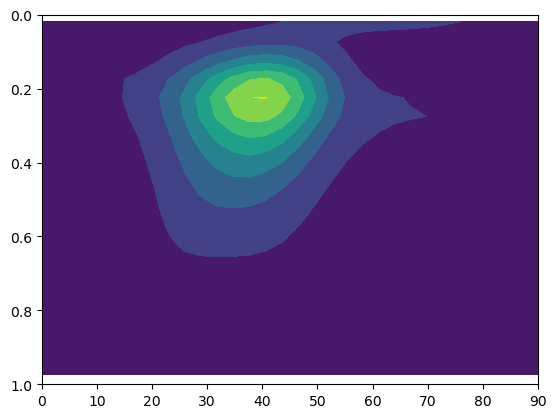

In [135]:
plt.figure()
plt.contourf(yy, sigma_mean2, np.nanmean(EKE[5,:,:,32:], axis=(0,3)))
plt.ylim([1,0])

In [136]:
check_days_length = int(end - start)

EOF1_all = np.zeros(((int(total_pr), 20, 32)))
EOF2_all = np.zeros(((int(total_pr), 20, 32)))

PC1_all = np.zeros((int(total_pr), total_day))
PC2_all = np.zeros((int(total_pr), total_day))

judge = total_day - (u.shape[2] * u.shape[3])/2
if judge >0:
    n_component = int((u.shape[2] * u.shape[3])/2)
else:
    n_component = total_day
explain_all = np.zeros((int(total_pr), 150))

interpolation_times = 10
a = 0

yys           = np.linspace(0, 90, 32*interpolation_times)
sigma_mean2s  = np.linspace(0,  1, 20*interpolation_times)

cyy           = np.cos(np.deg2rad(yys))
y             = np.linspace(0,90,32)
cy           = np.cos(np.deg2rad(y))


a = 0
for pr in range(pr_start, pr_to, pr_leap):
    sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
    sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
    yy, sigma_mean2 = np.meshgrid(y, sigma_onlyz)

    # y_nhalf = np.linspace(0,90,32)
    # yy_nhalf, sigma_mean2_nhalf = np.meshgrid(y_nhalf,sigma_onlyz)

    # Step1. interpolation
    # u_zy = np.nanmean(u[a,:,:,:,:], axis=3) #[time, z, y] 
    u_zy = np.nanmean(EKE[a,:,:,32:,:], axis=3)
    # u_zy = np.nanmean(VT[a,:,:,:,:], axis=3)
    
    # u_zy_thin = np.zeros(((u_zy.shape[0], 20*interpolation_times, 32*interpolation_times)))

    # for i in range(u_zy.shape[0]):
    #     interp_spline          = RectBivariateSpline(sigma_onlyz, y[32:], u_zy[i, :,32:])
    #     u_zy_thin[i,:,:]       = interp_spline(sigma_mean2s, yys) # (time, 200, 320)

    # u_nhalf = u[:,:,:,:,:] 
    u_nhalf_w = np.zeros(u_zy.shape)
    for i in range(np.shape(u_zy)[0]): 
        for j in range(np.shape(u_zy)[1]):
                u_nhalf_w[i,j,:] = u_zy[i,j,:] * (cy[:])**0.5
                
    # biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])
    # biggest_u_y, biggest_u_y_idx = find_nearest(yys, value=y_biggest_all[a])
    
    # print(yys[biggest_u_y_idx-40:biggest_u_y_idx+40])
    # print(yys[biggest_u_y_idx])
    
    u_final = np.reshape(u_nhalf_w[:,:,:], (u_nhalf_w.shape[0], u_nhalf_w.shape[1]*u_nhalf_w.shape[2]))

    single_EOF = EOF((u_final,), n_components=20*32, field="1D")
    single_EOF.get()
    # Step 3: PC / PC_std and EOF * PC_std
    PCs    = single_EOF.PC[0,:]
    PC2s   = single_EOF.PC[1,:]
    
    EOFs   = single_EOF.EOF[0,:]
    EOF2s  = single_EOF.EOF[1,:]
    
    EOF1_all[a,:] = np.reshape(EOFs,  (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))
    EOF2_all[a,:] = np.reshape(EOF2s, (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))

    PC1_all[a,:] = PCs
    PC2_all[a,:] = PC2s
    print(a)
    a += 1
    
# fig.tight_layout()
print("done")
# plt.savefig("check_U_EOF.png", dpi=300., bbox_inches='tight')
# plt.show()

0
1
2
3
4
5
done


(1.0, 0.0)

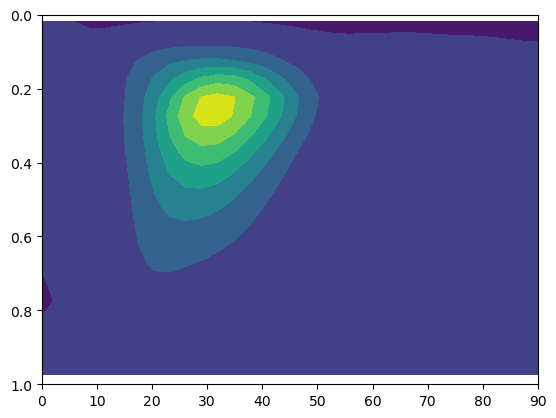

In [137]:
plt.figure()
plt.contourf(yy, sigma_mean2, EOF1_all[0])
plt.ylim([1,0])

In [138]:
PC1_all_new = np.zeros((int(total_pr), int(total_day)))

for i in range(int(total_pr)):
    print(i)
    PC1_all_new[i,:] = (PC1_all[i,:] - PC1_all[i,:].mean()) / PC1_all[i,:].std()

print(PC1_all_new.std())
print(PC1_all_new.mean())

0
1
2
3
4
5
1.0
1.924386576016938e-16


In [139]:
lg = 80
N = int(lg/2)
judge = total_day / lg
print(round(judge))
if round(judge) == total_day / lg:
    all_window = np.zeros(((int(total_pr),int(total_day/(lg)), int(lg/2))))
else:
    all_window = np.zeros(((int(total_pr),round(judge), int(lg))))
    
print(int(total_day/lg))
    

print(all_window.shape)

30
30
(6, 30, 40)


In [140]:
# Calculate power spectrum
def calc_power_spectrum(signal, chunk_size = 80):
    size = np.floor(chunk_size / 2).astype(int)
    # print(size)
    ak   = fft(signal) / len(signal)
    freq = fftfreq(len(signal))
    xx_final = fftshift(freq)
    # sp   = 2 * ck * ck.conj() / len(signal)**2
    ak[:size]      *= 2
    ak.imag[:size] *= -1
    sp   =  (ak.real**2 + ak.imag**2)
    return (xx[:size]), sp[:size]

In [141]:
a = 0
chunk_size  = 80
sp_list = np.zeros(np.floor(chunk_size /2).astype(int))
for pr in range(pr_start, pr_to, pr_leap):
    for i in range(0, 30, 1):
        freq, sp = calc_power_spectrum(PC1_all_new[a,i*80:(i+1)*80])
        sp_list[:] = sp / sp.sum()
        all_window[a,i,:] = sp_list 
        # plt.plot(sp_list, label=f"{i}th window")
    a += 1
    
# plt.legend()
# plt.xlabel('Wavenumbers',fontsize=12)
# plt.ylabel('Magnitudes',fontsize=12)
# plt.title("80 days window PC1 u fft")


In [142]:
all_window.shape

(6, 30, 40)

In [143]:
import matplotlib.colors as colors
import matplotlib as mpl

### for color
rgb=([112,115,115])
rgb=np.array(rgb)/255.0
icmap=colors.ListedColormap(rgb,name='my_color')
cmap=mpl.cm.viridis

cmap_color=icmap  
# bound=[1E-4,10E-4,25E-4,50e-4,100E-4,150E-4,200E-4,250e-4]
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]])/255

0.9001686125394981
0.9182689149177634
0.9236402203435945
0.9610304423452005
0.929826591301671
0.942753243930929
coefficient = 1.0


(-0.005, 0.25)

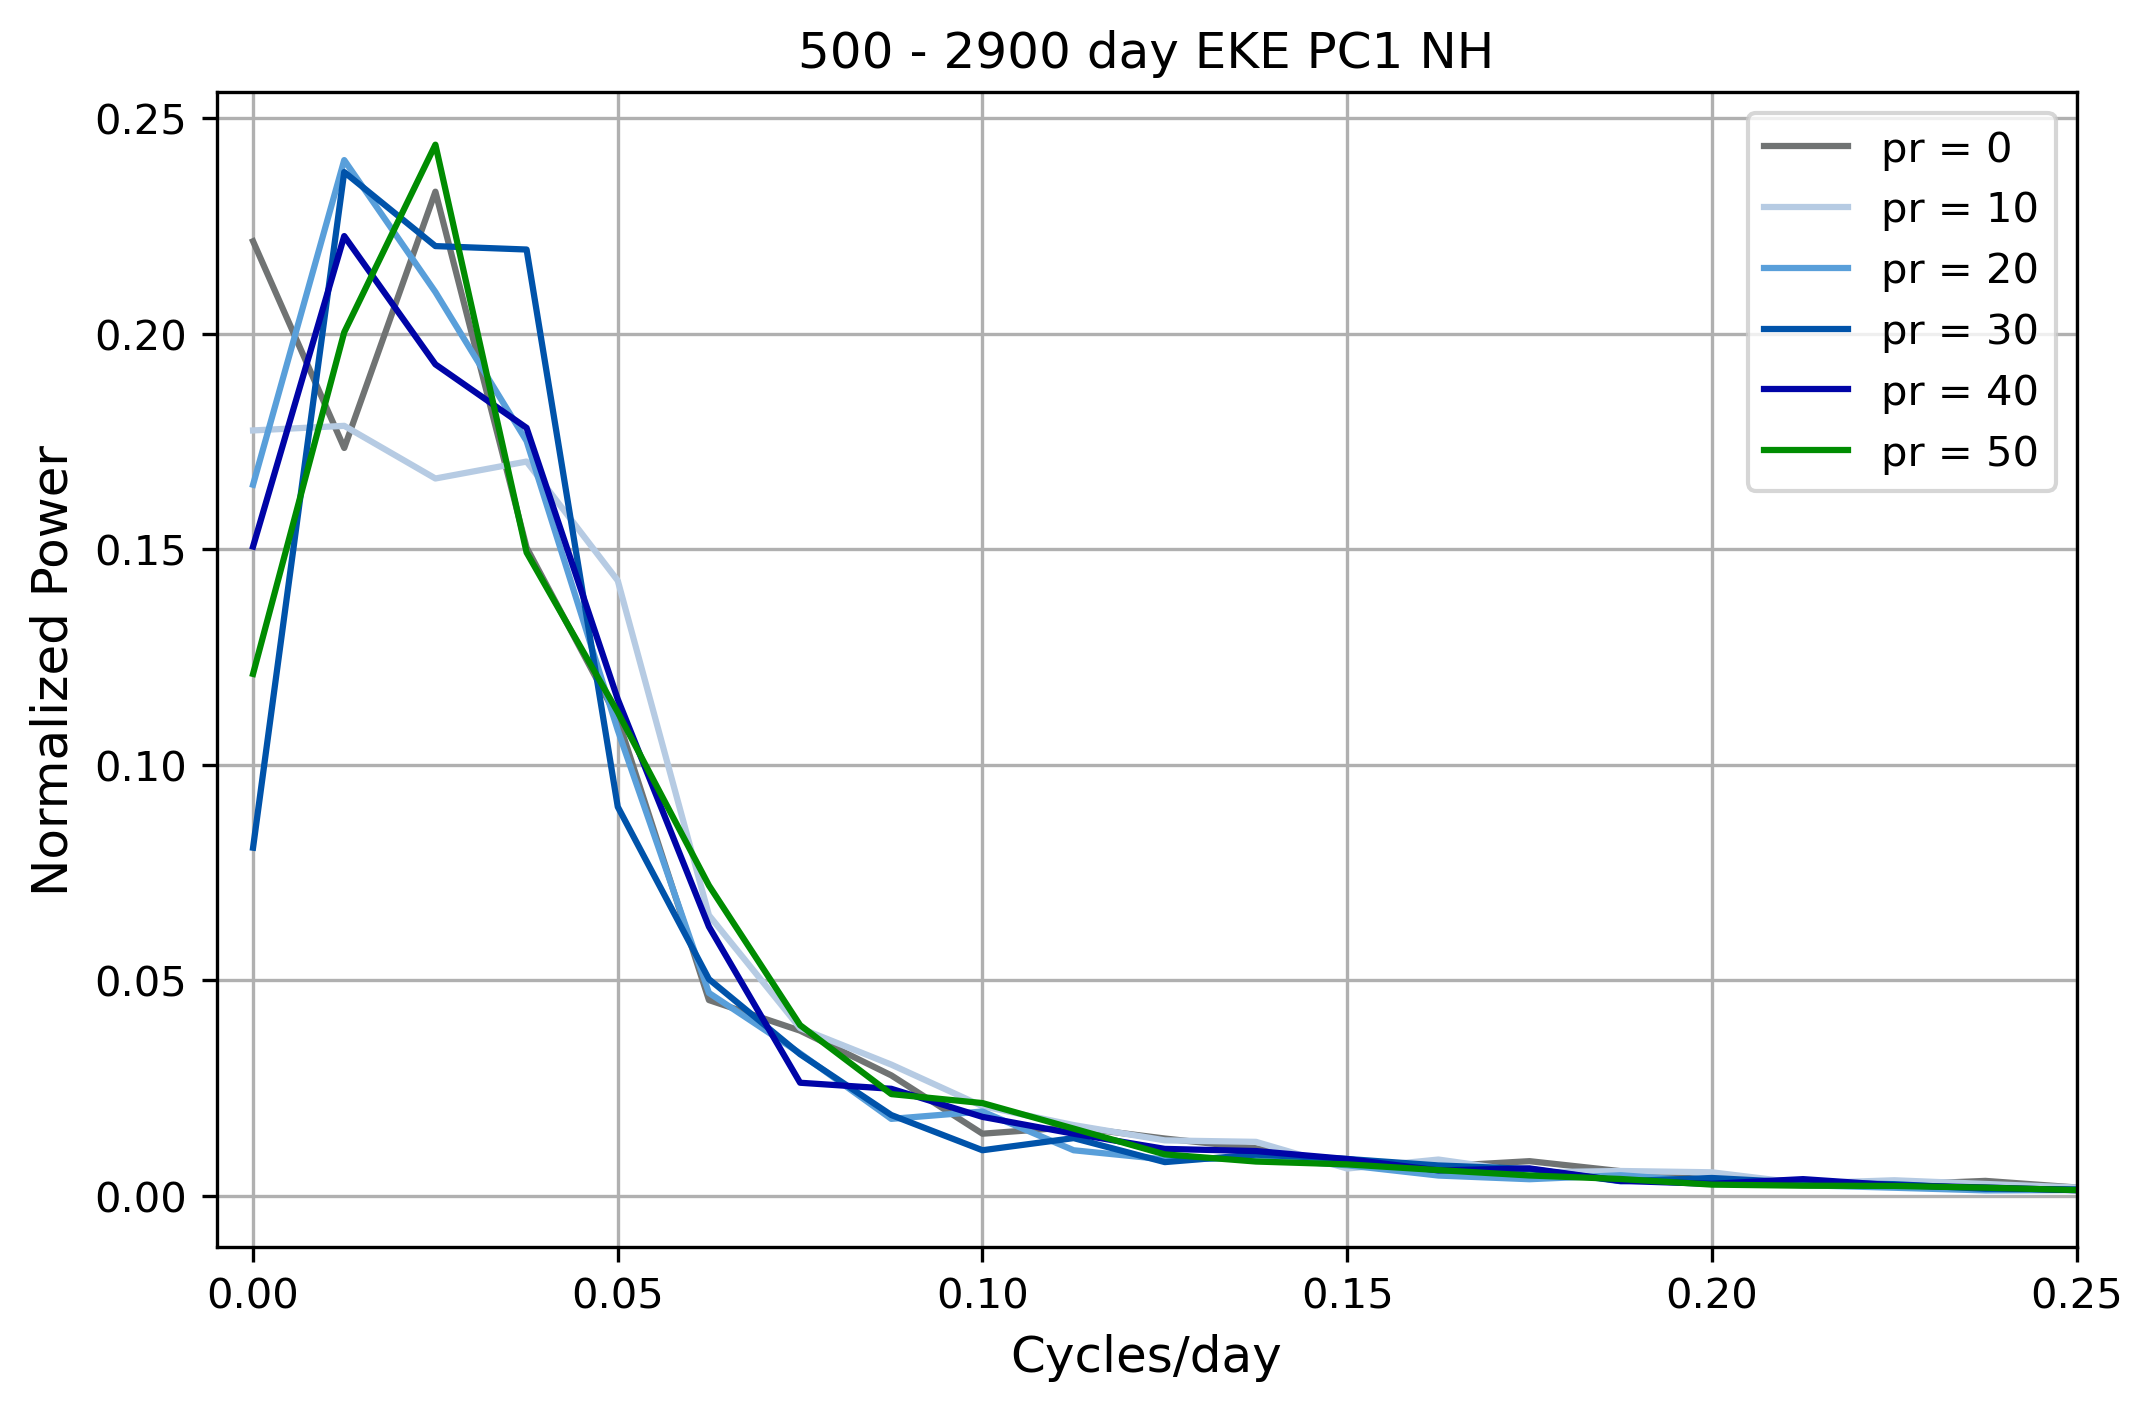

In [144]:
########################################################################
a = 0
fig,ax = plt.subplots(1,figsize=(8,5), dpi=300.)

for pr in range(pr_start, pr_to, pr_leap):
    mean_all_window = np.nanmean(all_window[a,:,:], axis=0)
    xx = np.arange(0,40)
    
    area = np.trapz(mean_all_window)
    print(area)
    
    ax.plot(xx[:]/80,  mean_all_window[:]/area, label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])#/ np.nanmax(mean_all_window[:])))
    a += 1
ax.set_xlabel('Cycles/day',fontsize=12)
ax.set_ylabel('Normalized Power',fontsize=12)
# plt.title("fft (500-2900 day divided into 80 days window) -> 30 PC1s -> covariance \n-> average these 30 windows")
ax.set_title("500 - 2900 day EKE PC1 NH")
print("coefficient =", np.sum(np.nanmean(all_window[-1,:,:], axis=0)))
ax.grid()
plt.xticks(np.arange(0,0.55,0.05))
plt.legend()
plt.xlim([-0.005,0.25])

# plt.savefig("500 - 2900 day Red noise EKE.png", dpi=300, bbox_inches='tight')


In [145]:
sigma_mean2.shape

(20, 32)

Text(0.5, 1.0, 'Shading: EOF, contour:u')

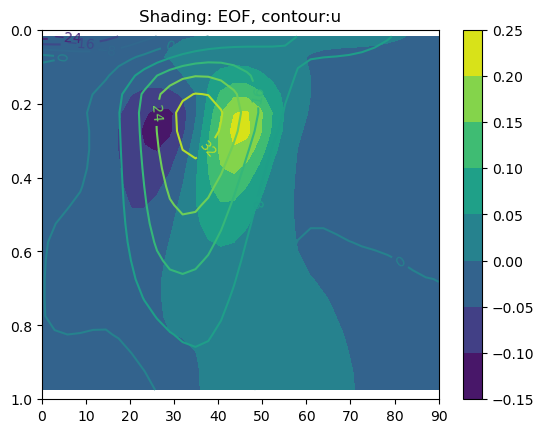

In [146]:
plt.figure()
CS = plt.contourf(yy, sigma_mean2, EOF2_all[0])
plt.colorbar(CS)
CS2 = plt.contour(yy[:,:], sigma_mean2[:,:], np.nanmean(u[0,:,:,32:], axis=(0,3)))
plt.clabel(CS2)
plt.ylim([1,0])
plt.title("Shading: EOF, contour:u")

In [147]:
mean_all_window / np.nanmax(mean_all_window)

array([0.49645683, 0.82154458, 1.        , 0.61199324, 0.46002337,
       0.29515206, 0.16224818, 0.09666883, 0.08811564, 0.06384332,
       0.03932892, 0.032503  , 0.02981501, 0.02435156, 0.01924175,
       0.01589021, 0.01055322, 0.00950758, 0.00929699, 0.00762518,
       0.00532989, 0.00564151, 0.00516051, 0.00438993, 0.00353348,
       0.00457904, 0.00241737, 0.00301767, 0.00352001, 0.00155435,
       0.00232063, 0.00200452, 0.00193873, 0.00142994, 0.00124319,
       0.00177503, 0.00158381, 0.00124524, 0.00137055, 0.00156471])

In [148]:
print(xx/80)
print(freq)

[0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125
 0.125  0.1375 0.15   0.1625 0.175  0.1875 0.2    0.2125 0.225  0.2375
 0.25   0.2625 0.275  0.2875 0.3    0.3125 0.325  0.3375 0.35   0.3625
 0.375  0.3875 0.4    0.4125 0.425  0.4375 0.45   0.4625 0.475  0.4875]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


# try U

In [149]:
check_days_length = int(end - start)

EOF1_all = np.zeros(((int(total_pr), 20, 32)))
EOF2_all = np.zeros(((int(total_pr), 20, 32)))

PC1_all = np.zeros((int(total_pr), total_day))
PC2_all = np.zeros((int(total_pr), total_day))

judge = total_day - (u.shape[2] * u.shape[3])/2
if judge >0:
    n_component = int((u.shape[2] * u.shape[3])/2)
else:
    n_component = total_day
explain_all = np.zeros((int(total_pr), 150))

interpolation_times = 10
a = 0

yys           = np.linspace(0, 90, 32*interpolation_times)
sigma_mean2s  = np.linspace(0,  1, 20*interpolation_times)

cyy           = np.cos(np.deg2rad(yys))
y             = np.linspace(0,90,32)
cy            = np.cos(np.deg2rad(y))
for pr in range(pr_start, pr_to, pr_leap):
    sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
    sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
    yy, sigma_mean2 = np.meshgrid(y, sigma_onlyz)

    # y_nhalf = np.linspace(-90,0,32)
    # yy_nhalf, sigma_mean2_nhalf = np.meshgrid(y_nhalf,sigma_onlyz)

    # Step1. interpolation
    u_zy = np.nanmean(u[a,:,:,32:,:], axis=3) #[time, z, y] 
    # u_zy = np.nanmean(EKE[a,:,:,:,:], axis=3)
    # u_zy = np.nanmean(VT[a,:,:,:,:], axis=3)
    
    # u_zy_thin = np.zeros(((u_zy.shape[0], 20*interpolation_times, 32*interpolation_times)))

    # for i in range(u_zy.shape[0]):
    #     interp_spline          = RectBivariateSpline(sigma_onlyz, y[32:], u_zy[i, :,32:])
    #     u_zy_thin[i,:,:]       = interp_spline(sigma_mean2s, yys) # (time, 200, 320)

    # u_nhalf = u[:,:,:,:,:] 
    u_nhalf_w = np.zeros(u_zy.shape)
    for i in range(np.shape(u_zy)[0]): 
        for j in range(np.shape(u_zy)[1]):
                u_nhalf_w[i,j,:] = u_zy[i,j,:] * (cy[:])**0.5
                
    # biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])
    # biggest_u_y, biggest_u_y_idx = find_nearest(yys         , value=y_biggest_all[a])
    
    # print(biggest_u_z_idx)
    # print(biggest_u_y_idx)
    
    u_final =  np.reshape(u_nhalf_w[:,:,:], (u_nhalf_w.shape[0], u_nhalf_w.shape[1]*u_nhalf_w.shape[2]))

    single_EOF = EOF((u_final[:,:],), n_components=20*32, field="1D")
    single_EOF.get()
    # Step 3: PC / PC_std and EOF * PC_std
    PCs    = single_EOF.PC[0,:]
    PC2s   = single_EOF.PC[1,:]
    
    EOFs   = single_EOF.EOF[0,:]
    EOF2s  = single_EOF.EOF[1,:]
    
    EOF1_all[a,:,:] = np.reshape(EOFs,  (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))
    EOF2_all[a,:,:] = np.reshape(EOF2s, (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))

    PC1_all[a,:] = PCs
    PC2_all[a,:] = PC2s
    
    a += 1
    
# fig.tight_layout()
print("done")
# plt.savefig("check_U_EOF.png", dpi=300., bbox_inches='tight')
# plt.show()

done


In [94]:
EOF2_all.shape

(6, 20, 32)

Text(0.5, 1.0, 'Shading: u EOF, contour:u')

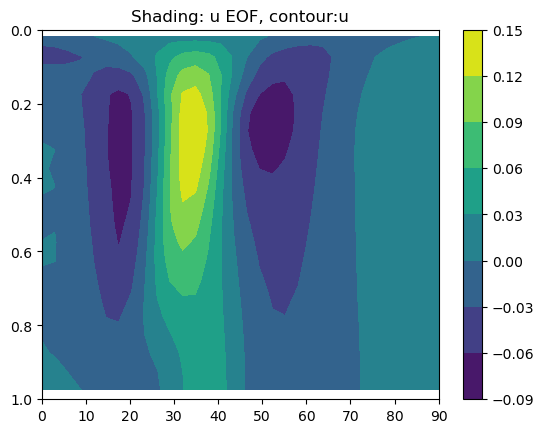

In [95]:
plt.figure()
CS = plt.contourf(yy, sigma_mean2, EOF2_all[1])
plt.colorbar(CS)
#CS2 = plt.contour(yy[:,32:], sigma_mean2[:,32:], np.nanmean(u[0,:,:,32:], axis=(0,3)))
#plt.clabel(CS2)
plt.ylim([1,0])
plt.title("Shading: u EOF, contour:u")

In [96]:
PC2_all_new = np.zeros((int(total_pr), int(total_day)))

for i in range(int(total_pr)):
    print(i)
    PC2_all_new[i,:] = (PC2_all[i,:] - PC2_all[i,:].mean()) / PC2_all[i,:].std()

print(PC2_all_new.std())
print(PC2_all_new.mean())

0
1
2
3
4
5
1.0
-3.3948152930760344e-16


In [97]:
lg = 80
N = int(lg/2)
judge = total_day / lg
print(round(judge))
if round(judge) == total_day / lg:
    all_window = np.zeros(((int(total_pr),int(total_day/(lg)), int(lg/2))))
else:
    all_window = np.zeros(((int(total_pr),round(judge), int(lg))))
    
print(int(total_day/lg))
    
print(all_window.shape)

30
30
(6, 30, 40)


0.8812214621751474
0.893450542693087
0.8905885205295646
0.9062177617921774
0.8955174165152553
0.9183710776365763
coefficient = 1.0


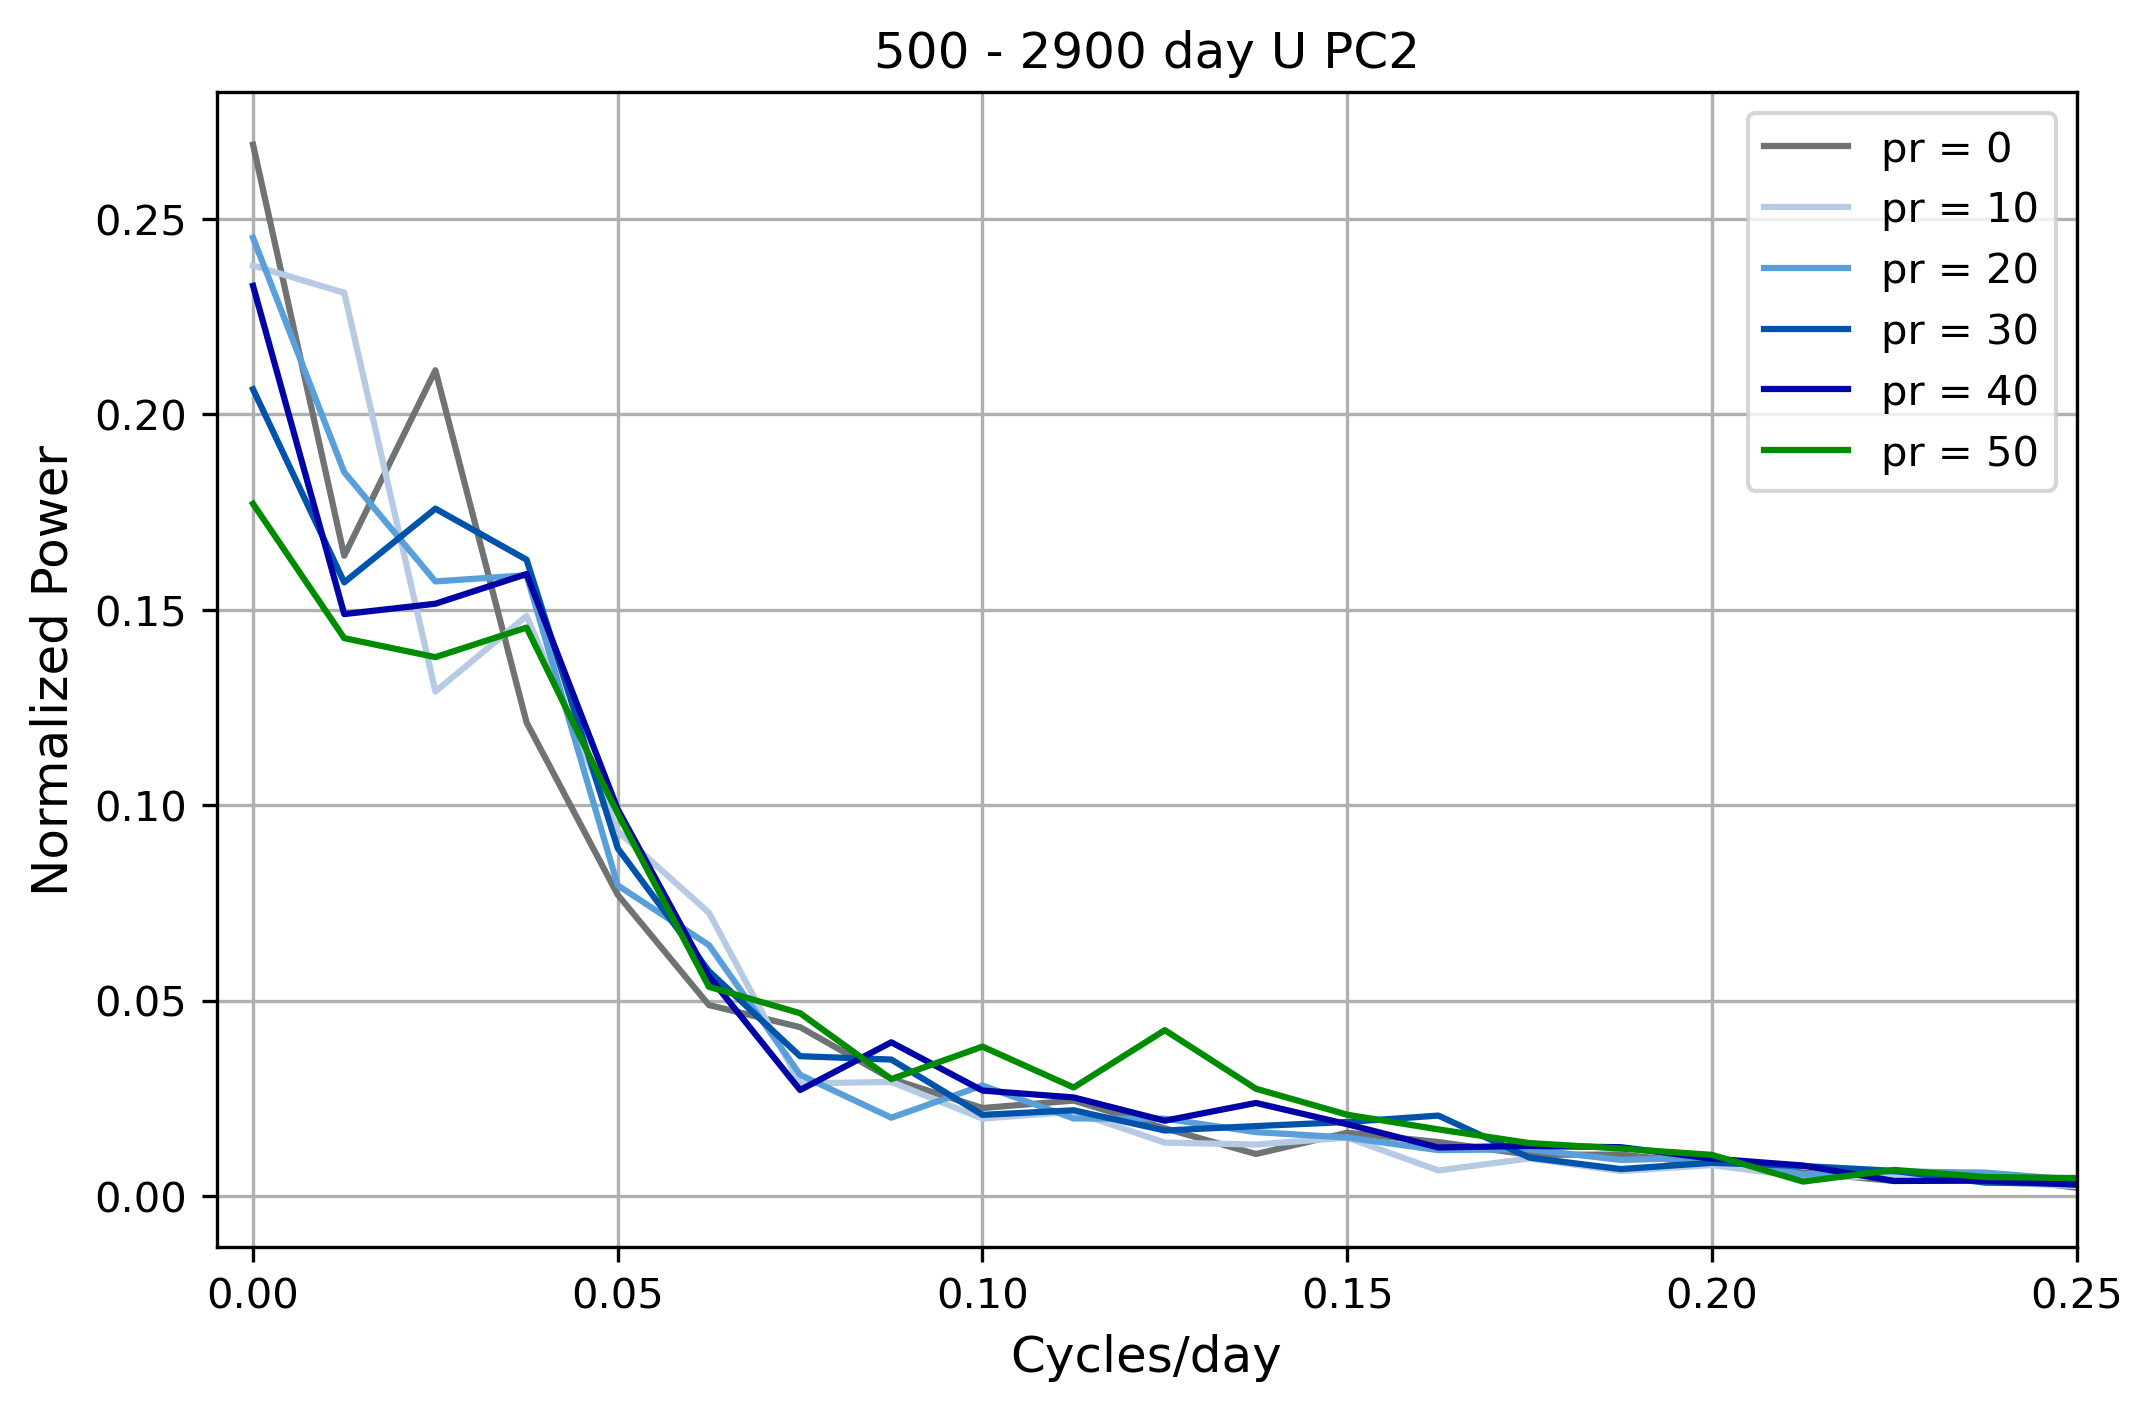

In [98]:

#######################################################################################
#a = 0
#chunk_size = 80

#sp_list = np.zeros((len(PC2_all_new), np.floor(chunk_size / 2).astype(int)))

#freq, sp = calc_power_spectrum(PC2_all_new)
#sp_list[a] = sp / sp.sum()
#####################################################################################
a = 0
chunk_size = 80
sp_list = np.zeros(np.floor(chunk_size /2).astype(int))
for pr in range(pr_start, pr_to, pr_leap):
    for i in range(0, 30,1):
        freq, sp = calc_power_spectrum(PC2_all_new[a,i*80:(i+1)*80])
        sp_list[:] = sp / sp.sum()
        all_window[a,i,:] = sp_list 
        # plt.plot(sp_list, label=f"{i}th window")
    a += 1
# plt.legend()
# plt.xlabel('Wavenumbers',fontsize=12)
# plt.ylabel('Magnitudes',fontsize=12)
# plt.title("80 days window PC2 u fft")
########################################################################
a = 0
fig, ax = plt.subplots(1,figsize=(8,5),dpi=300.)

for pr in range(pr_start, pr_to, pr_leap):
    mean_all_window = np.nanmean(all_window[a,:,:], axis=0)
    
    area = np.trapz(mean_all_window)
    print(area)
    ax.plot(xx/80,  mean_all_window[:]/area, label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    a += 1
ax.set_xlabel('Cycles/day',fontsize=12)
ax.set_ylabel('Normalized Power',fontsize=12)
# plt.title("fft (500-2900 day divided into 80 days window) -> 30 PC1s -> covariance \n-> average these 30 windows")
ax.set_title(r"500 - 2900 day U PC2")
print("coefficient =", np.sum(np.nanmean(all_window[-1,:,:], axis=0)))
ax.grid()
ax.legend()
ax.set_xticks(np.arange(0,0.55,0.05))
plt.xlim([-0.005,0.25])

plt.savefig("500 - 2900 day Red noise U.png", dpi=300, bbox_inches='tight')


(40,)


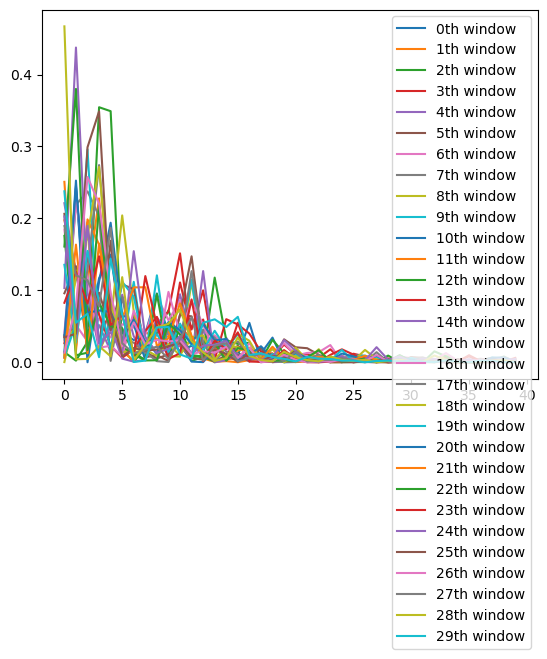

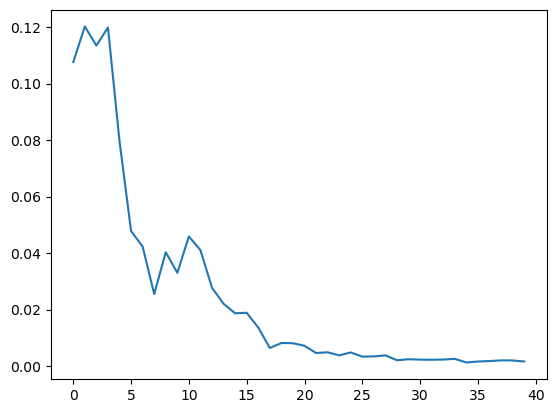

In [836]:
plt.figure()
for i in range(30):
    plt.plot(all_window[-1,i,:], label=f"{i}th window")
test = np.nanmean(all_window[-1], axis=0)
print(test.shape)
plt.legend()

plt.figure()
plt.plot(mean_all_window)
# plt.plot(test)

In [572]:
PC2_all_new.shape

(6, 2400)

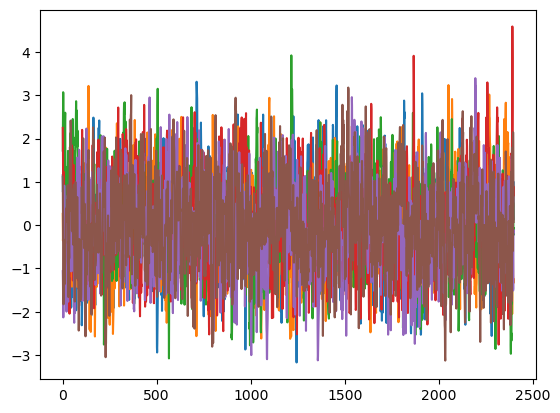

In [573]:
plt.figure()
for i in range(6):
    plt.plot(PC2_all_new[i])

In [ ]:
plt.figure()
plt.plot(sp_list)

In [ ]:
all_window[0,20:30,0].mean()

In [ ]:
PC2_all_new.shape

In [ ]:
sp_list[0]

In [ ]:
all_window[0,:,0]

In [ ]:
all_window[0,:,0].shape